In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
cap_df = pd.read_csv('top_cap.csv')
cap_df

,symbol,name,cap
0,BTCUSDT,Bitcoin,2158439046234
1,ETHUSDT,Ethereum,319891011292
2,USDTUSDT,Tether,155519510212
3,XRPUSDT,XRP,135245711026
4,BNBUSDT,BNB,95961402012
...,...,...,...
95,USDCUSDT,Binance Bridged USDC (BNB Smart Chain),997535505
96,METHUSDT,Mantle Staked Ether,988969790
97,XDCUSDT,XDC Network,976090358
98,ABUSDT,AB,972863598


In [3]:
df = pd.read_csv('data.csv')
df = df[['close','symbol']]

rer = pd.DataFrame()
for i in df.symbol.unique():
    rer[f'{i}'] = df[df['symbol'] == f'{i}'].reset_index().drop(columns=['index','symbol']).rename(columns={'close':f'{i}'})

df = rer.dropna(axis=1, how='any')

In [4]:
df

,BTCUSDT,ETHUSDT,BNBUSDT,LTCUSDT,ADAUSDT,XRPUSDT,XLMUSDT,TRXUSDT,ETCUSDT,VETUSDT,...,SUIUSDT,PEPEUSDT,WLDUSDT,FDUSDUSDT,SEIUSDT,TIAUSDT,BONKUSDT,JUPUSDT,ENAUSDT,TAOUSDT
0,66504.33,3511.46,604.30,76.59,0.4013,0.5047,0.0969,0.11678,24.09,0.02738,...,0.8907,0.000011,3.027,1.0002,0.3788,7.260,0.000023,0.8560,0.6760,288.5
1,65175.32,3483.42,588.60,72.66,0.3837,0.4910,0.0914,0.11544,23.05,0.02552,...,0.8001,0.000011,2.826,1.0002,0.3438,6.410,0.000021,0.7397,0.6270,293.6
2,64974.37,3560.51,599.30,73.77,0.3844,0.4933,0.0934,0.11582,23.98,0.02604,...,0.8654,0.000011,2.797,1.0001,0.3582,6.530,0.000021,0.7732,0.6350,299.5
3,64869.99,3513.08,587.70,74.69,0.3844,0.4888,0.0939,0.11679,24.06,0.02673,...,0.8942,0.000011,3.033,1.0002,0.3604,6.370,0.000021,0.7664,0.6130,299.1
4,64143.56,3518.50,586.10,74.17,0.3760,0.4889,0.0920,0.11835,23.56,0.02614,...,0.9201,0.000011,2.981,1.0005,0.3636,6.410,0.000020,0.7655,0.6000,286.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,105671.73,2642.65,654.75,86.13,0.6613,2.1899,0.2673,0.27180,17.11,0.02342,...,3.2078,0.000012,1.027,0.9981,0.1843,1.927,0.000015,0.4255,0.3111,385.8
361,106066.59,2579.19,655.35,86.55,0.6420,2.1472,0.2608,0.26970,16.90,0.02260,...,3.0758,0.000011,1.004,0.9980,0.1800,1.804,0.000015,0.4168,0.3005,375.5
362,105414.64,2530.76,645.61,85.18,0.6247,2.1394,0.2564,0.27110,16.63,0.02206,...,2.9470,0.000011,0.975,0.9980,0.1758,1.793,0.000015,0.4114,0.2925,363.5
363,105594.01,2547.61,648.19,86.30,0.6334,2.1655,0.2587,0.27390,16.68,0.02226,...,3.0233,0.000011,0.980,0.9980,0.1765,1.757,0.000015,0.4317,0.3031,367.1


# Solver

In [5]:
def find_optimal_parameters(df, symbol_list=None, 
                            min_last_days=30, max_last_days=100, step_day=1,
                            min_procent=0.01, max_procent=1.0, step_procent=0.05,
                            min_std_procent=0.01, max_std_procent=0.5, step_std=0.01):
    results = {}

    if symbol_list is None:
        symbol_list = df.columns.tolist()

    for symbol in symbol_list:
        optimal_procent = max_procent
        optimal_last_days = min_last_days
        optimal_std_procent = max_std_procent

        for last_days in range(min_last_days, max_last_days + 1, step_day):
            df_slice = df[symbol].iloc[-last_days:]
            mean_val = df_slice.mean()

            for std_procent in np.arange(max_std_procent, min_std_procent, -step_std):
                std_n = mean_val * std_procent

                for procent in np.arange(max_procent, min_procent, -step_procent):
                    min_historical = df[symbol].min() * (procent + 1.0)
                    min_support = df_slice.min() * (procent + 1.0)
                    max_historical = df[symbol].max()
                    max_resist = df_slice.max()

                    if df_slice.std() <= std_n and mean_val <= min_historical:
                        if (procent < optimal_procent or
                            (procent == optimal_procent and last_days > optimal_last_days) or
                            (procent == optimal_procent and last_days == optimal_last_days and std_procent < optimal_std_procent)):
                            optimal_procent = procent
                            optimal_last_days = last_days
                            optimal_std_procent = std_procent

        last_price = df[symbol].iloc[-1]

        results[symbol] = (optimal_procent, optimal_last_days, optimal_std_procent, min_support, min_historical, max_historical, max_resist, last_price)

    results = pd.DataFrame(results).T
    results.columns = ['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent', 'Min Support', 'Min Historical', 'Max Historical', 'Max Resist', 'Last Price']
    results = results.sort_values(by=['Optimal Procent', 'Optimal Last Days', 'Optimal Std Procent'], 
                                    ascending=[True, False, False])

    return results

In [6]:
optimal_symbol = find_optimal_parameters(
    df, symbol_list=None, 
    min_last_days=30, max_last_days=100, step_day=5,
    min_procent=0.01, max_procent=1.0, step_procent=0.05,
    min_std_procent=0.01, max_std_procent=0.5, step_std=0.01
)

In [17]:
ignore_symbols = ['USDCUSDT', 'FDUSDUSDT']
optimal_symbol = optimal_symbol[~optimal_symbol.index.isin(ignore_symbols)]

In [18]:
optimal_symbol

,Optimal Procent,Optimal Last Days,Optimal Std Procent,Min Support,Min Historical,Max Historical,Max Resist,Last Price
ICPUSDT,0.15,90.0,0.09,4.816350,4.816350,15.218000,6.199000,5.657000
APTUSDT,0.15,30.0,0.07,4.565400,4.565400,14.670000,6.138000,4.879000
FILUSDT,0.20,85.0,0.09,2.379300,2.379300,8.083000,3.245000,2.551000
OPUSDT,0.20,80.0,0.11,0.619500,0.619500,2.675000,0.921000,0.615000
DOTUSDT,0.25,100.0,0.10,3.546900,3.546900,10.673000,5.309000,3.978000
SHIBUSDT,0.25,100.0,0.10,0.000011,0.000011,0.000033,0.000017,0.000012
ETCUSDT,0.25,100.0,0.08,14.773500,14.773500,38.270000,20.700000,17.480000
UNIUSDT,0.30,100.0,0.13,5.014800,5.014800,18.601000,8.665000,7.803000
AVAXUSDT,0.30,100.0,0.11,16.842000,16.842000,53.980000,25.820000,19.850000
ATOMUSDT,0.30,100.0,0.09,3.759000,3.759000,10.393000,5.384000,4.279000


In [19]:
result = optimal_symbol.head(5).index.to_list()

In [20]:
result

['ICPUSDT', 'APTUSDT', 'FILUSDT', 'OPUSDT', 'DOTUSDT']

# Побудова графіку

In [29]:
def paint_result(df, result, info_df, cap_df, last_days=365):
    num_columns = len(result)
    fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(16, 6 * num_columns))

    if num_columns == 1:
        axes = [axes]

    for idx, symbol in enumerate(result):
        series = df[symbol].iloc[-last_days:]
        ax = axes[idx]
        series.plot(ax=ax)

        symbol_cap = cap_df[cap_df['symbol'] == symbol]['cap'].values[0]
        symbol_cap = symbol_cap / 1000_000_000

        min_support = info_df.loc[symbol, 'Min Support']
        max_resist = info_df.loc[symbol, 'Max Resist']

        ax.axhspan(min_support, max_resist, color='lightgreen', alpha=0.1)

        ax.axhline(min_support, color='orange', linestyle='--', 
                label=f"Min Support ({min_support:.2f})")
        ax.axhline(info_df.loc[symbol, 'Min Historical'], color='red', linestyle='--', 
                label=f"Min Historical ({info_df.loc[symbol, 'Min Historical']:.2f})")
        ax.axhline(max_resist, color='orange', linestyle='--', 
                label=f"Max Resist ({max_resist:.2f})")
        ax.axhline(info_df.loc[symbol, 'Last Price'], color='green', linestyle='--', 
                label=f"Last Price ({info_df.loc[symbol, 'Last Price']:.2f})")
        ax.axhline(info_df.loc[symbol, 'Max Historical'], color='red', linestyle='--', 
                label=f"Max Historical ({info_df.loc[symbol, 'Max Historical']:.2f})")

        ax.set_title(f"{symbol} capitalization: {symbol_cap:.2f}B USD")
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.5)

        # Обмеження по осі Y: 
        lower_limit = min_support * 0.5
        upper_limit = max_resist * 1.5
        ax.set_ylim(lower_limit, upper_limit)

    plt.tight_layout()
    plt.show()

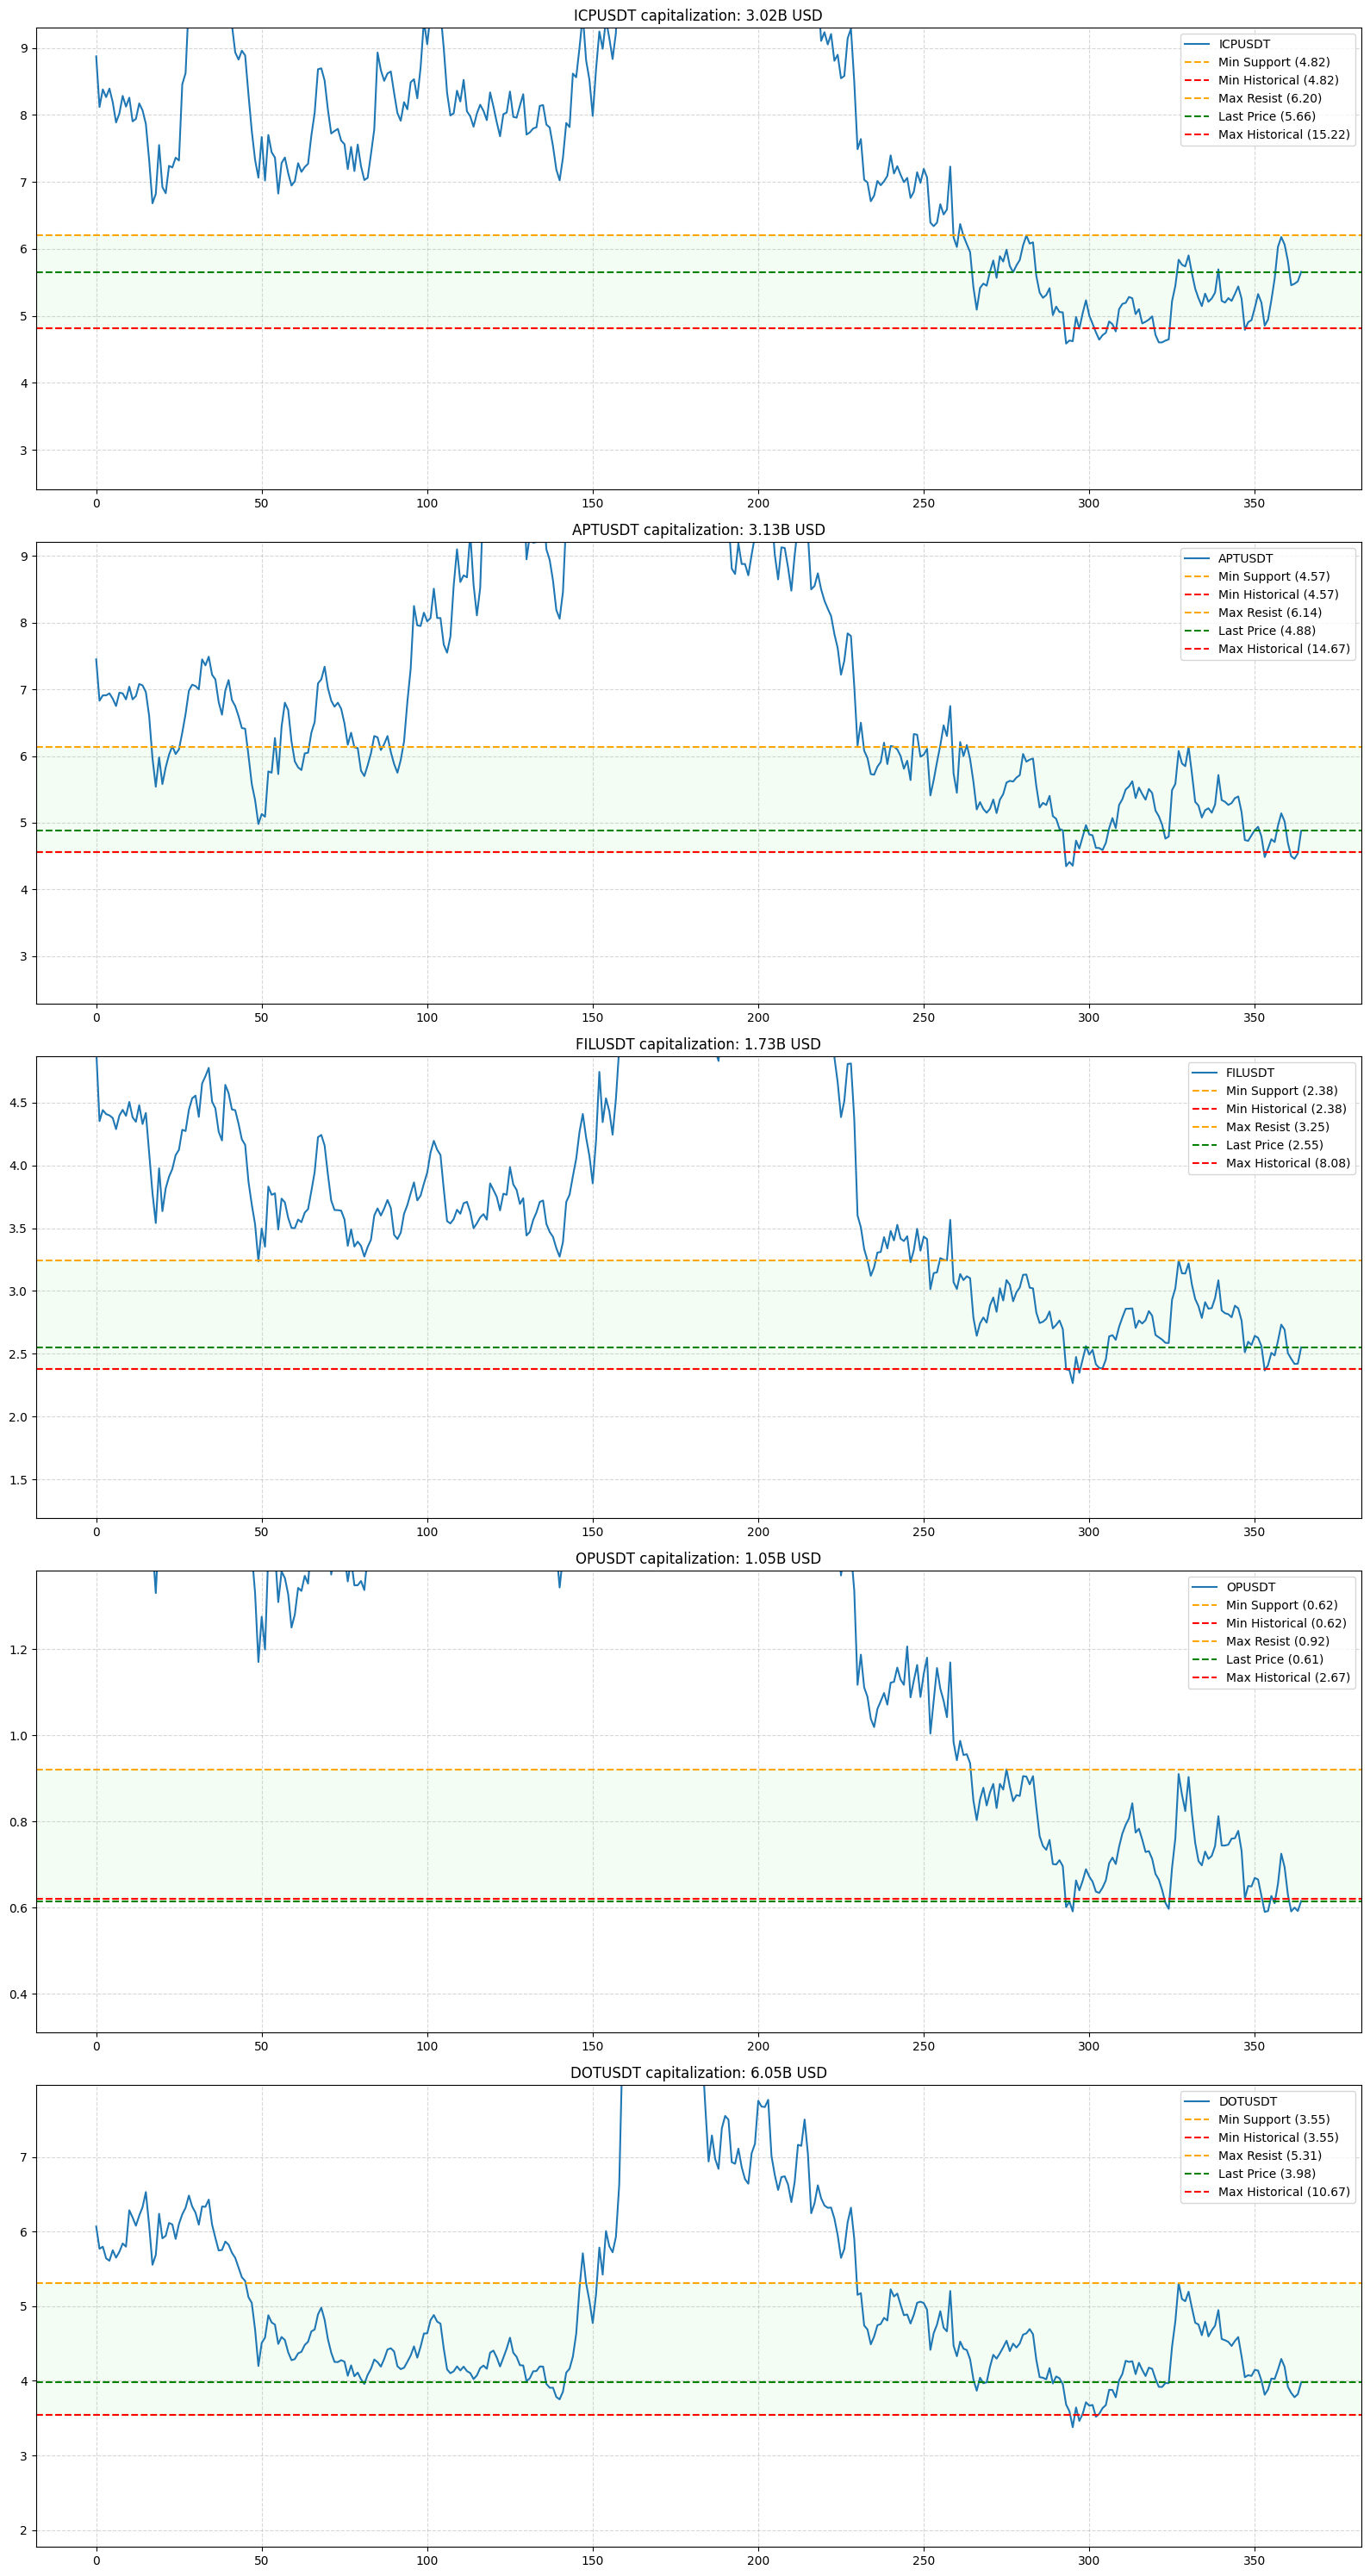

In [30]:
paint_result(df, result, optimal_symbol, cap_df, last_days=365)

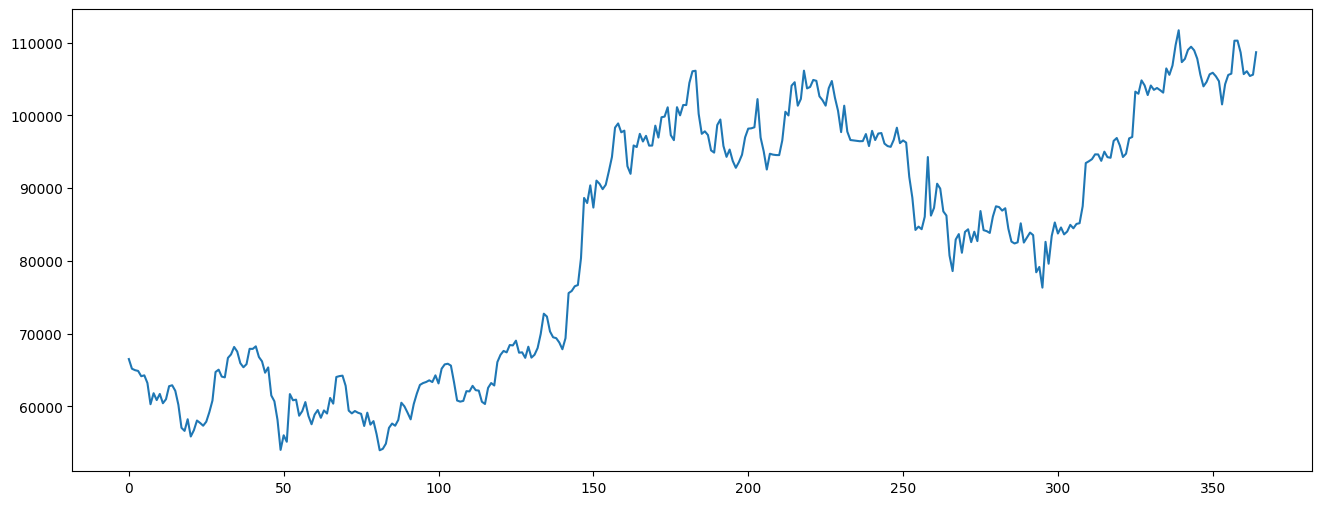

In [12]:
plt.figure(figsize=(16, 6))
df['BTCUSDT'].plot()
plt.show()